In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import fisher_exact
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.font_manager as font_manager
import pandas as pd
font_dirs = ['/mnt/e/Misc/Python_Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'tahoma'
import itertools
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
stats_r = importr('stats')

In [2]:
d17_GFP_histograms = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Mutukula_etal_Revision/data/D17_GFP_intensity_histograms.tsv',sep='\t',index_col=0)
d17_GFP_values = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Mutukula_etal_Revision/data/D17_GFP_intensity_values.tsv',sep='\t',index_col=0)

In [3]:
d17_GFP_values['Protocol'] = d17_GFP_values.index 
d17_GFP_values

,Org,MEAN,MEDIAN,N HES5+ Rosettes,Protocol
Protocol,,,,,
NT,NT_1,16.937000,0,6,NT
NT,NT_2,12.524000,0,5,NT
NT,NT_3,8.496000,0,2,NT
NT,NT_4,10.334000,0,2,NT
NT,NT_5,6.233000,0,3,NT
NT,NT_6,20.701000,0,9,NT
NT,NT_7,12.749000,0,4,NT
NT,NT_8,16.340786,0,3,NT
NT,NT_9,18.023000,0,7,NT


In [4]:
from scipy import stats

In [5]:
def get_annot(pval):
    if pval < 0.0001: return '****'
    elif pval < 0.001: return '***'
    elif pval < 0.01: return '**'
    elif pval < 0.05: return '*'
    else: return 'n.s.'

NT WNTi 0.0664504771099935
NT SBN 1.1170876900373021e-07
NT SBNX 4.095204065490508e-10
WNTi SBN 1.3788415944636917e-07
WNTi SBNX 4.663280721608041e-10
SBN SBNX 0.00037799571488391026
('NT', 'SBNX') 1.3989842164824122e-09
('WNTi', 'SBNX') 1.3989842164824122e-09
('NT', 'SBN') 2.0682623916955376e-07
('WNTi', 'SBN') 2.0682623916955376e-07
('SBN', 'SBNX') 0.0004535948578606923
('NT', 'WNTi') 0.0664504771099935


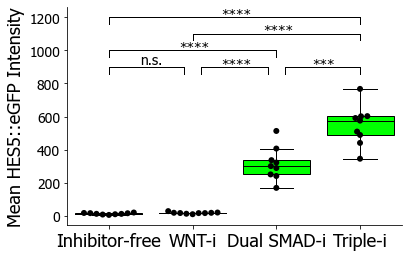

In [6]:
plt.figure(figsize=(6,4))

ax = sns.boxplot(x="Protocol", y='MEAN', data=d17_GFP_values,showfliers=False,color='white',
                linewidth=2)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='MEAN', data=d17_GFP_values, color="black", s=6)#".25")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('Mean HES5::eGFP Intensity',fontsize=18)

'''
y=0.7
for j,idx in enumerate([[0,1]]):
    y_new = y+1*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black')
    plt.plot([idx[0],idx[0]],[y_new-0.05,y_new],'-',color='black')
    plt.plot([idx[1],idx[1]],[y_new-0.05,y_new],'-',color='black')
    plt.annotate('*',xy=(idx[0]+0.49*(idx[1]-idx[0]),y_new+0.02),fontsize=16)
'''

pval_dict = {}
txs = ['NT','WNTi','SBN','SBNX',]
for tx1,tx2 in itertools.combinations(txs,2):
    means1,means2 = d17_GFP_values.loc[tx1]['MEAN'].values,d17_GFP_values.loc[tx2]['MEAN'].values
    t, p = stats.ttest_ind(means1,means2)
    print(tx1,tx2,p)
    pval_dict[(tx1,tx2)] = p
    
qval_dict = {}
sorted_pvals = sorted(pval_dict.items(),key=lambda x:x[1])
pvalues = [x[1] for x in sorted_pvals]
p_adjust = list(stats_r.p_adjust(FloatVector(pvalues), method = 'BH'))
for j,pair in enumerate(sorted_pvals):
    qval_dict[pair[0]] = p_adjust[j]
    print(pair[0],p_adjust[j])

y_new = 900
for y,comp in zip([[0,0.9],[1.1,1.9],[2.1,3]],[('NT','WNTi'),('WNTi','SBN'),('SBN','SBNX')]):
    plt.plot([y[0],y[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([y[0],y[0]],[y_new-40,y_new],'-',color='black',linewidth=1)
    plt.plot([y[1],y[1]],[y_new-40,y_new],'-',color='black',linewidth=1)
    annot_ = get_annot(qval_dict[comp])
    if '*' in annot_:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.04,y_new-10),fontsize=14)
    else:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.02,y_new+20),fontsize=14)

y_new += 100
for y,comp in zip([[0,2],[1,3],[0,3]],[('NT','SBN'),('WNTi','SBNX'),('NT','SBNX')]):
    plt.plot([y[0],y[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([y[0],y[0]],[y_new-40,y_new],'-',color='black',linewidth=1)
    plt.plot([y[1],y[1]],[y_new-40,y_new],'-',color='black',linewidth=1)
    annot_ = get_annot(qval_dict[comp])
    if '*' in annot_:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.04,y_new-10),fontsize=14)
    else:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.02,y_new+20),fontsize=14)
    y_new += 100
    
'''
y_new = 800
for x,y in zip(itertools.combinations(txs,2),itertools.combinations([0,1,2,3],2)):
    print(x,y)
    plt.plot([y[0],y[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([y[0],y[0]],[y_new-40,y_new],'-',color='black',linewidth=1)
    plt.plot([y[1],y[1]],[y_new-40,y_new],'-',color='black',linewidth=1)
    y_new += 150
    #qval = qval_dict[(x[0],x[1])]
    #plt.annotate('',xy=y[0]+(y[1]-y[0])/2.,fontsize=16)
'''

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('lime')
    box.set_linewidth(1)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
        ax.lines[j].set_color('black')
        ax.lines[j].set_linewidth(1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.yticks()
plt.xticks([0,1,2,3],['Inhibitor-free','WNT-i','Dual SMAD-i','Triple-i'],fontsize=18)
plt.title('')
#plt.ylim(0,1200)
#plt.title('Relative VZ/OSVZ Area',fontsize=20)
plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Revision/Figures/Countings/hes5_gfp_intensity.png',dpi=500,bbox_inches='tight')
plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Revision/Figures/Countings/hes5_gfp_intensity.pdf')

NT WNTi 0.3821643341240746
NT SBN 0.013001184839836847
NT SBNX 7.502170249426468e-05
WNTi SBN 0.00015528086252431216
WNTi SBNX 0.00012171405746894973
SBN SBNX 4.644270956509708e-06
('SBN', 'SBNX') 2.7865625739058247e-05
('NT', 'SBNX') 0.00022506510748279403
('WNTi', 'SBNX') 0.00023292129378646824
('WNTi', 'SBN') 0.00023292129378646824
('NT', 'SBN') 0.015601421807804215
('NT', 'WNTi') 0.3821643341240746


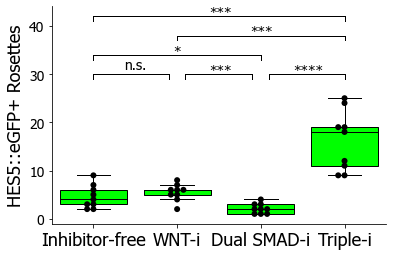

In [7]:
plt.figure(figsize=(6,4))

ax = sns.boxplot(x="Protocol", y='N HES5+ Rosettes', data=d17_GFP_values,showfliers=False,color='white',
                linewidth=2)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='N HES5+ Rosettes', data=d17_GFP_values, color="black", s=6)#".25")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('HES5::eGFP+ Rosettes',fontsize=18)

'''
y=0.7
for j,idx in enumerate([[0,1]]):
    y_new = y+1*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black')
    plt.plot([idx[0],idx[0]],[y_new-0.05,y_new],'-',color='black')
    plt.plot([idx[1],idx[1]],[y_new-0.05,y_new],'-',color='black')
    plt.annotate('*',xy=(idx[0]+0.49*(idx[1]-idx[0]),y_new+0.02),fontsize=16)
'''

pval_dict = {}
txs = ['NT','WNTi','SBN','SBNX',]
for tx1,tx2 in itertools.combinations(txs,2):
    means1,means2 = d17_GFP_values.loc[tx1]['N HES5+ Rosettes'].values,d17_GFP_values.loc[tx2]['N HES5+ Rosettes'].values
    t, p = stats.ttest_ind(means1,means2)
    print(tx1,tx2,p)
    pval_dict[(tx1,tx2)] = p
    
qval_dict = {}
sorted_pvals = sorted(pval_dict.items(),key=lambda x:x[1])
pvalues = [x[1] for x in sorted_pvals]
p_adjust = list(stats_r.p_adjust(FloatVector(pvalues), method = 'BH'))
for j,pair in enumerate(sorted_pvals):
    qval_dict[pair[0]] = p_adjust[j]
    print(pair[0],p_adjust[j])

    
y_new = 30
for y,comp in zip([[0,0.9],[1.1,1.9],[2.1,3]],[('NT','WNTi'),('WNTi','SBN'),('SBN','SBNX')]):
    plt.plot([y[0],y[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([y[0],y[0]],[y_new-1,y_new],'-',color='black',linewidth=1)
    plt.plot([y[1],y[1]],[y_new-1,y_new],'-',color='black',linewidth=1)
    annot_ = get_annot(qval_dict[comp])
    if '*' in annot_:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.04,y_new-0.2),fontsize=14)
    else:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.02,y_new+1),fontsize=14)

y_new += 4
for y,comp in zip([[0,2],[1,3],[0,3]],[('NT','SBN'),('WNTi','SBNX'),('NT','SBNX')]):
    plt.plot([y[0],y[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([y[0],y[0]],[y_new-1,y_new],'-',color='black',linewidth=1)
    plt.plot([y[1],y[1]],[y_new-1,y_new],'-',color='black',linewidth=1)
    annot_ = get_annot(qval_dict[comp])
    if '*' in annot_:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.04,y_new-0.2),fontsize=14)
    else:
        plt.annotate(annot_,xy=(y[0]+(y[1]-y[0])/2.-len(annot_)*0.02,y_new+1),fontsize=14)
    y_new += 4

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('lime')
    box.set_linewidth(1)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
        ax.lines[j].set_color('black')
        ax.lines[j].set_linewidth(1)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.yticks()
plt.xticks([0,1,2,3],['Inhibitor-free','WNT-i','Dual SMAD-i','Triple-i'],fontsize=18)
plt.title('')
#plt.ylim(0,40)
#plt.ylim(0,1500)
#plt.title('Relative VZ/OSVZ Area',fontsize=20)
plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Revision/Figures/Countings/hes5_rosettes.png',dpi=500,bbox_inches='tight')
plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Revision/Figures/Countings/hes5_rosettes.pdf')